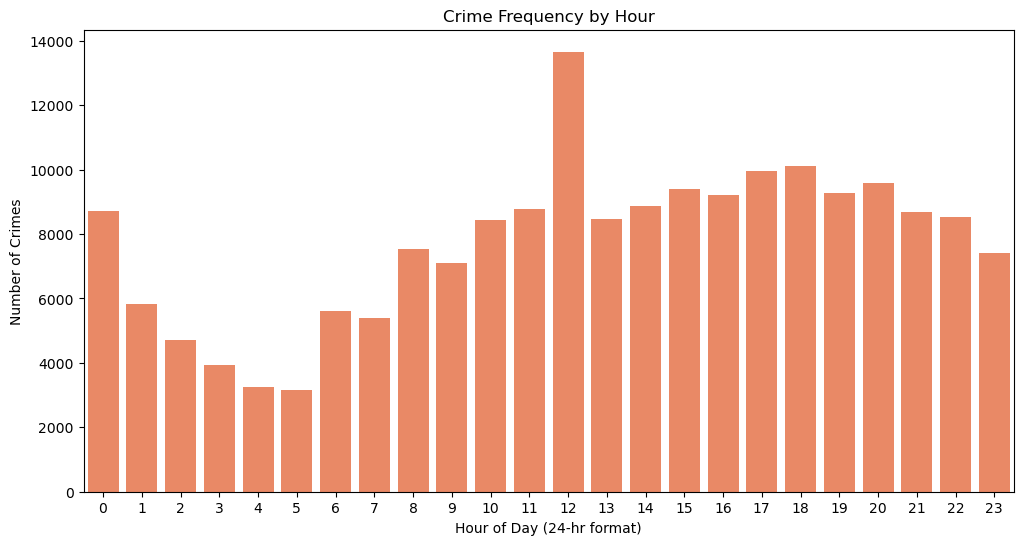

Peak crime hour: 12
Area with most night crimes: Central
Age Bracket
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64
peak_crime_hour = 12
peak_night_crime_location = Central
victim_ages =
Age Bracket
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64


In [5]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

# Fix the variable name from 'crime' to 'crimes'
crimes['HOUR OCC'] = crimes['TIME OCC'].astype(str).str.zfill(4).str[:2].astype(int)

# Plot the crime frequency by hour
plt.figure(figsize=(12,6))
sns.countplot(data=crimes, x='HOUR OCC', color='coral')
plt.title("Crime Frequency by Hour")
plt.xlabel("Hour of Day (24-hr format)")
plt.ylabel("Number of Crimes")
plt.show()

# Find the peak crime hour
peak_crime_hour = crimes['HOUR OCC'].value_counts().idxmax()
print("Peak crime hour:", peak_crime_hour)

# Filter for night crimes
night_hours = [22, 23, 0, 1, 2, 3]
night_crimes = crimes[crimes['HOUR OCC'].isin(night_hours)]

# Find the area with the most night crimes
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()
print("Area with most night crimes:", peak_night_crime_location)

# Define age bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Drop missing ages
crimes = crimes[crimes['Vict Age'].notna()]

# Bin the ages
crimes['Age Bracket'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels)

# Create the Series for victim ages
victim_ages = crimes['Age Bracket'].value_counts().sort_index()
print(victim_ages)

# Summary of variables
print("peak_crime_hour =", peak_crime_hour)
print("peak_night_crime_location =", peak_night_crime_location)
print("victim_ages =")
print(victim_ages)